In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math

# Importing scraped data from Pytorch forum - https://discuss.pytorch.org/

df=pd.read_csv('/content/drive/My Drive/PytorchCommunityData.csv')
df.head(10)

,Unnamed: 0,Topic Title,Category,Tags,Leading Post,Post Replies,Created_at,Likes,Views,Replies
0,113,About the audio category,audio,[],(Replace this first paragraph with a brief des...,['It would be nice to have some links or somet...,3/15/2018 8:35,0,643,2
1,114,Error while importing torchaudio,audio,[],\n Bug\nI’m getting this error:\nAttributeErro...,[],0,0,0,0
2,115,How do I know which spectrogram frames belong ...,audio,[],I’ve been using this script:\nspgram = torchau...,[],0,0,0,0
3,116,Constant/Variable Q Transform,audio,[],"Hi,\nI’ve been looking into using a Constant Q...",[],0,0,0,0
4,117,Invalid argument 0: Sizes of tensors must matc...,audio,[],"Hello, I am trying to train a speech enhanceme...",['These shape errors are often created for odd...,07-06-21 10:13,0,29,1
5,118,Expected 4-dimensional input for 4-dimensional...,audio,[],Hi there\nI am using below function for featur...,['@ptrblck sir please have a look in this code...,07-07-21 2:24,0,62,5
6,119,K-BS/breathsound-use-stethoscope/blob/main/tor...,audio,[],\n\ngithub.com\n\n\nK-BS/breathsound-use-steth...,[],0,0,0,0
7,120,Applying Attention (Single and MultiHead Atten...,audio,[],Applying Attention from paper\n\n\ndanielpovey...,"['torch.mm expects two matrices (2D tensors), ...",07-09-20 10:03,0,581,5
8,121,InverseMelScale,audio,[],If i get the below error what should my input ...,"[""Based on the error message it seems that you...",6/23/2021 6:09,0,86,8
9,122,GPU computations weirdly slowed down if callin...,audio,[],"Hi,\nI was training some audiovisual source se...",[],0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6560 entries, 0 to 6559
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    6560 non-null   int64 
 1   Topic Title   6560 non-null   object
 2   Category      6560 non-null   object
 3   Tags          4560 non-null   object
 4   Leading Post  6559 non-null   object
 5   Post Replies  6560 non-null   object
 6   Created_at    6543 non-null   object
 7   Likes         6543 non-null   object
 8   Views         6543 non-null   object
 9   Replies       6543 non-null   object
dtypes: int64(1), object(9)
memory usage: 512.6+ KB


In [4]:
#to see any null value present in our dataset
df.isnull().sum()

Unnamed: 0         0
Topic Title        0
Category           0
Tags            2000
Leading Post       1
Post Replies       0
Created_at        17
Likes             17
Views             17
Replies           17
dtype: int64

In [5]:
df["Tags"].fillna("[]", inplace = True)
df["Leading Post"].fillna("[]", inplace = True)
df["Replies"].fillna("[]", inplace = True)

In [6]:
#Replacing NaN values with empty values
df.isnull().sum()

Unnamed: 0       0
Topic Title      0
Category         0
Tags             0
Leading Post     0
Post Replies     0
Created_at      17
Likes           17
Views           17
Replies          0
dtype: int64

Text(0, 0.5, 'no of posts')

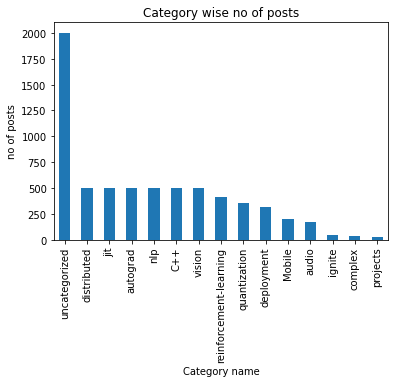

In [7]:
df['Category'].value_counts().plot.bar()
# Add title and axis names
plt.title('Category wise no of posts')
plt.xlabel('Category name')
plt.ylabel('no of posts')

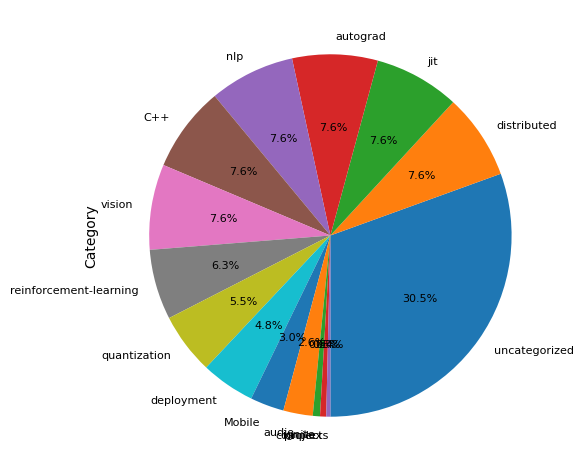

In [8]:
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)

df['Category'].value_counts().plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=270, fontsize=8)

In [10]:
df.drop(columns= ['Created_at', 'Likes', 'Views'], inplace=True)

In [11]:
df['post'] = df['Topic Title'] + ' ' + df['Leading Post'] + ' ' + df['Post Replies']

df['post'].head()

0    About the audio category (Replace this first p...
1    Error while importing torchaudio \n Bug\nI’m g...
2    How do I know which spectrogram frames belong ...
3    Constant/Variable Q Transform Hi,\nI’ve been l...
4    Invalid argument 0: Sizes of tensors must matc...
Name: post, dtype: object

##Table generation with Word count,Char count, Avg Word count & Stopwords

In [14]:
df['word_count'] = df['post'].apply(lambda x: len(str(x).split(" "))) ##to calculate word count 
df['char_count'] = df['post'].str.len() ## this also includes spaces
#to calculate avg word
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

df['avg_word'] = df['post'].apply(lambda x: avg_word(x))
#for stop words
import nltk
nltk.download('stopwords')
#from nltk.corpus import stopwords
stop = stopwords.words('english')

df['stopwords'] = df['post'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['post','word_count','char_count','avg_word','stopwords']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,post,word_count,char_count,avg_word,stopwords
0,About the audio category (Replace this first p...,117,765,5.196721,48
1,Error while importing torchaudio \n Bug\nI’m g...,765,2932,8.510121,16
2,How do I know which spectrogram frames belong ...,84,567,5.517241,27
3,"Constant/Variable Q Transform Hi,\nI’ve been l...",92,517,4.510638,42
4,Invalid argument 0: Sizes of tensors must matc...,852,4162,8.275773,68


In [15]:
Compare=df.loc[:,['word_count','stopwords']]
Compare.describe()

,word_count,stopwords
count,6560.000000,6560.000000
mean,596.316159,104.773933
std,993.509849,106.663420
min,5.000000,1.000000
25%,138.000000,41.000000
50%,292.000000,71.000000
75%,659.250000,128.000000
max,31135.000000,1061.000000


In [16]:

from bs4 import BeautifulSoup

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\'\“\”\’\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))
DIGITS_RE=re.compile('\w*\d\w*')

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = text.replace(r'\n', ' ')
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    #text = ''.join(word for word in text if word not in punct)  # remove punctuation
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    text = DIGITS_RE.sub('', text)
    return text

In [17]:
df['post']=df['post'].apply(clean_text)

In [18]:
# Removing extra spaces
df['post']=df['post'].apply(lambda x: re.sub(' +',' ',x))


# Frequent words

In [19]:
## 20 Common word removal
freq = pd.Series(' '.join(df['post']).split()).value_counts()[:20]
freq


x          17746
model      17086
#          16396
pytorch    10877
self       10369
+           9772
tensor      9019
def         8863
loss        8146
use         7663
return      7632
input       7518
using       7382
data        7267
code        7114
file        7032
print       6732
output      6721
error       6541
torch       6527
dtype: int64

In [20]:
freq = list(freq.index)
df['post'] = df['post'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['post'].head()

0    audio category replace first paragraph brief d...
1    importing torchaudio bugi getting errorattribu...
2    know spectrogram frames belong audio samples s...
3    constant variable q transform hi looking const...
4    invalid argument sizes tensors must match exce...
Name: post, dtype: object


# Rare words

In [22]:
##20 Rare words removal
rare = pd.Series(' '.join(df['post']).split()).value_counts()[-20:]
rare

defaultstk                             1
yarl                                   1
ramprasaath                            1
linear_layerparameters                 1
pandasdataframeto_csv                  1
selfcompute_u_x                        1
ltsthe                                 1
errorerrortraceback                    1
pytorch_androidprocessdebugmanifest    1
window_function                        1
bjniso                                 1
snli_valid                             1
accactual_batch_size                   1
selfupdate_critic                      1
discourselevel                         1
classifiervalueerror                   1
flask+docker+kubernetes                1
target_fake                            1
dataset_readerread                     1
mediocre                               1
dtype: int64

In [23]:
rare = list(rare.index)
df['post'] = df['post'].apply(lambda x: " ".join(x for x in x.split() if x not in rare))
df['post'].head()

0    audio category replace first paragraph brief d...
1    importing torchaudio bugi getting errorattribu...
2    know spectrogram frames belong audio samples s...
3    constant variable q transform hi looking const...
4    invalid argument sizes tensors must match exce...
Name: post, dtype: object

## Lemmatization

In [24]:
# Importing spacy
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization 
df['post']=df['post'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) ]))

In [25]:
df_grouped=df[['Category','post']].groupby(by='Category').agg(lambda x:' '.join(x))
df_grouped

,post
Category,
C++,c++ category topic relate c++ frontend c++ api...
Mobile,mobile category category dedicate ios android ...
audio,audio category replace first paragraph brief d...
autograd,autograd category category post relate autogra...
complex,complex category replace first paragraph brief...
deployment,deployment category category post focus produc...
distributed,distribute category replace first paragraph br...
ignite,ignite category replace first paragraph brief ...
jit,jit category category torchscript jit compiler...


# **Creating Document Term Matrix**

In [26]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['post'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df_grouped.index
df_dtm

,_api,_models_subset,_processedcsv,_sharedso,_staticuse,_x,_y,a__class,a_a,a_arr,a_arrappend,a_at,a_atshape,a_batch,a_batches,a_coeff,a_coeffs,a_coeffs_flippe,a_coeffsdevice,a_coeffsflip,a_coeffssize,a_d,a_de,a_dim,a_dist,a_distentropy,a_distlog_prob,a_distsample,a_down,a_downshape,a_en,a_fft,a_fftabs,a_fftdevice,a_fftimag,a_fftimagmax,a_fftimagmin,a_fftreal,a_fftrealmax,a_fftrealmin,...,zram,zramconfig,zramswap,zramswapconfig,zregister_hook,zrepeat_interleave,zrequires_grad,zs,zsalloum,zscore,zsding,zshape,zshgradle,zshrc,zsigma,zsize,zsldataset,zsq,zsqbackward,zsselfpriorlog_prob,zst,zstd,zsum,zt,zt_u,zt_u_transp,ztaoz,ztorchzeros,zu,zuniform,zunsqueeze,zuoxingdong,zuvor,zview,zwx,zy,zyl,zz,zzz,zzzf
Category,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C++,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,1,0
Mobile,0,0,0,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
audio,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,2,2,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
autograd,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,2,0,0,0,0,1,0,0,0,0
complex,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0
deployment,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
distributed,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,0,0,4
ignite,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
jit,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0


# **Word Cloud Generation**

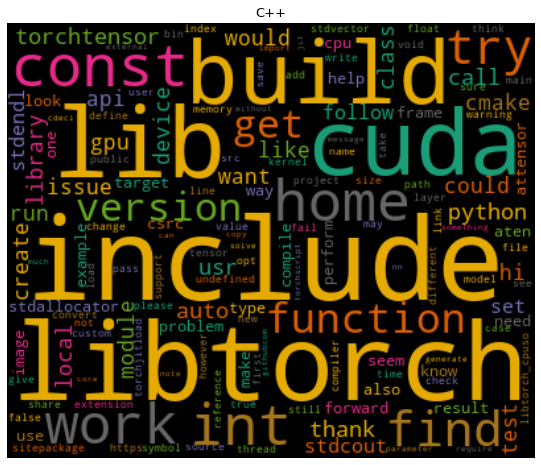

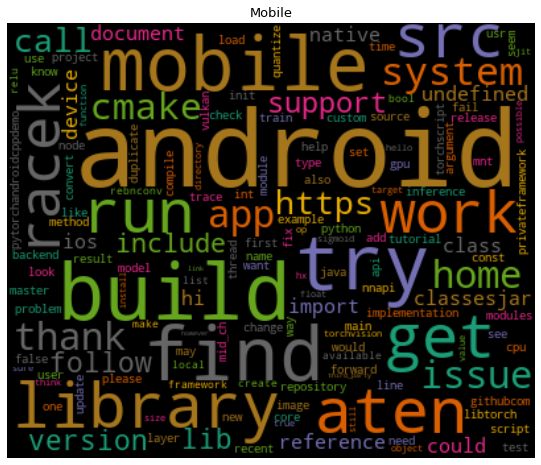

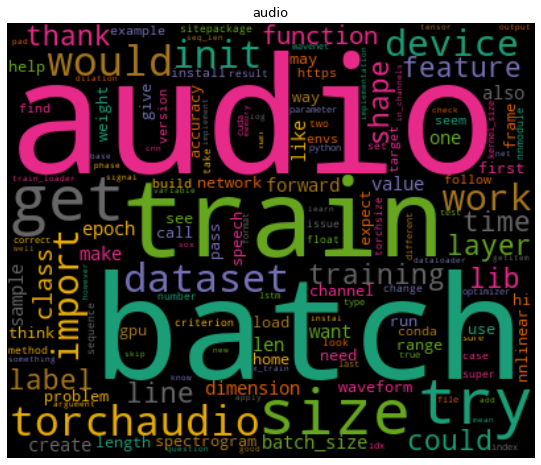

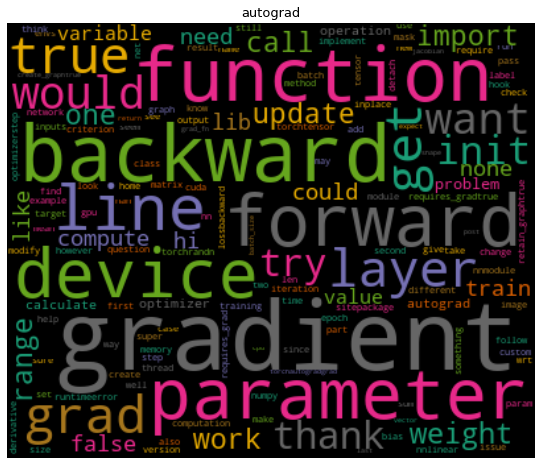

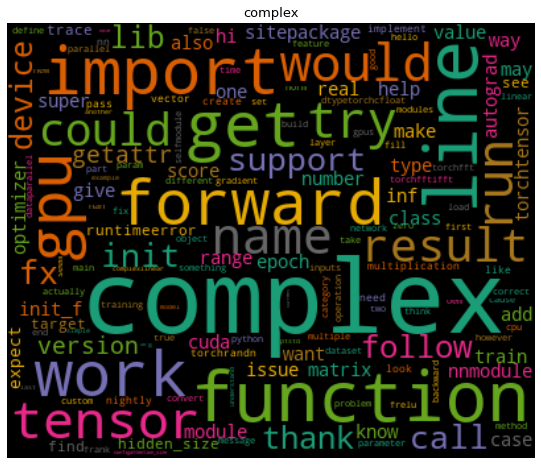

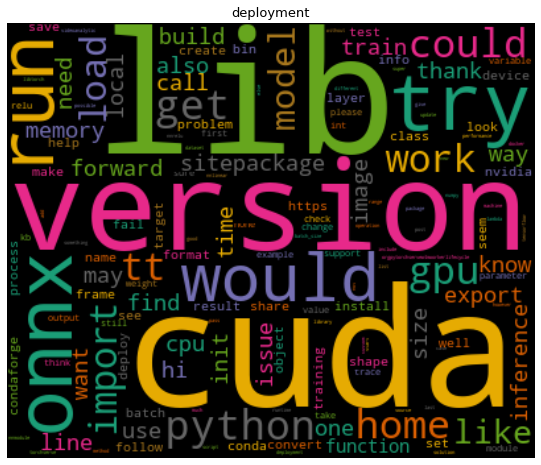

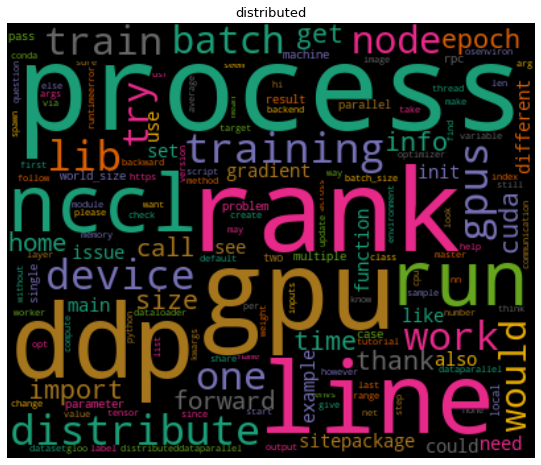

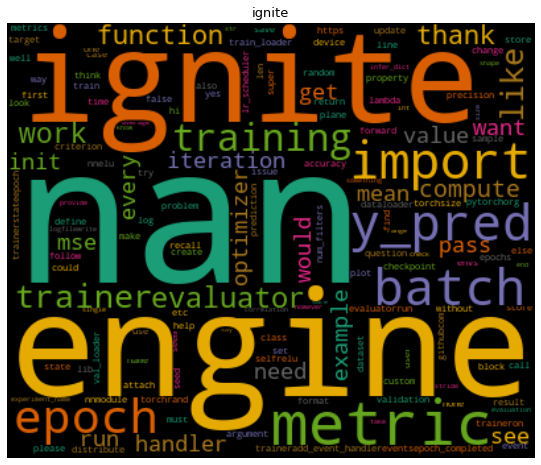

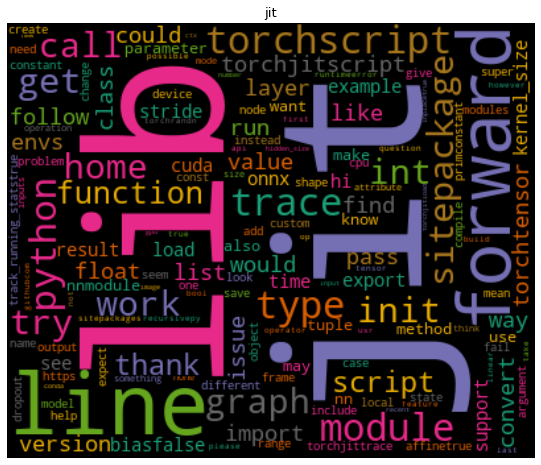

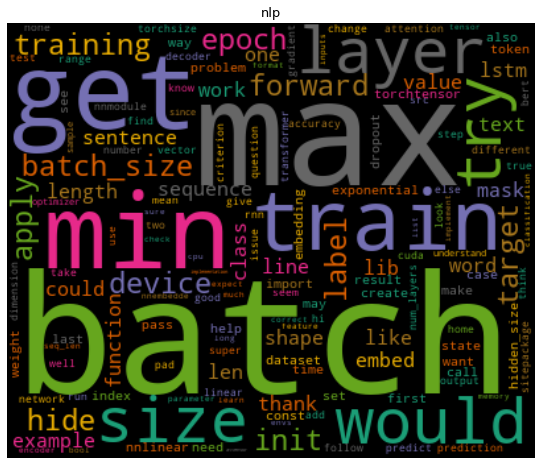

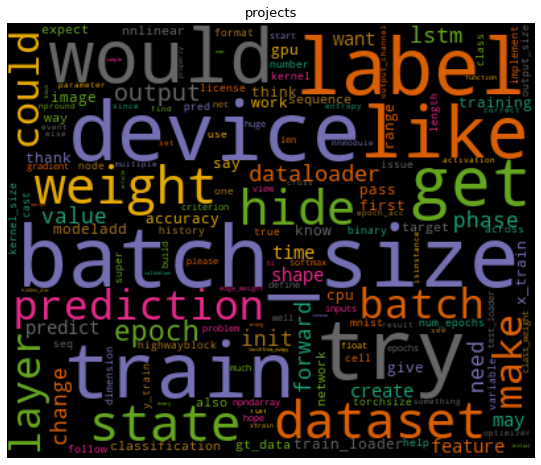

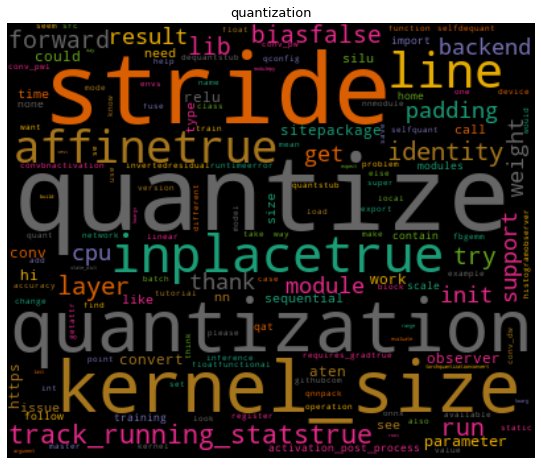

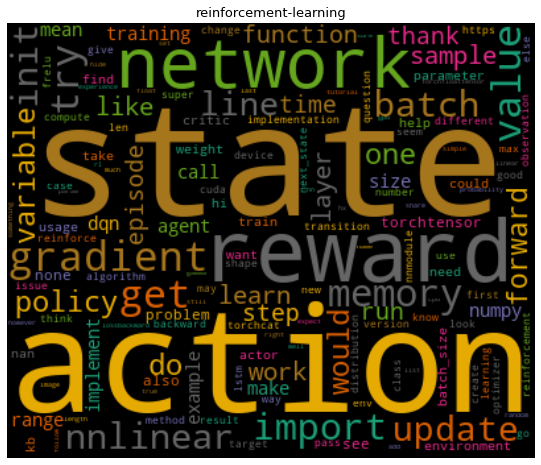

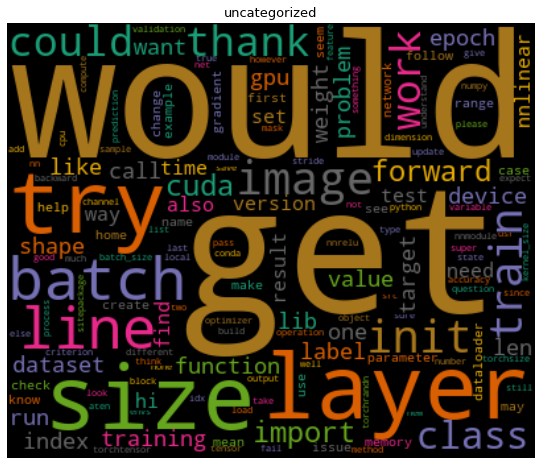

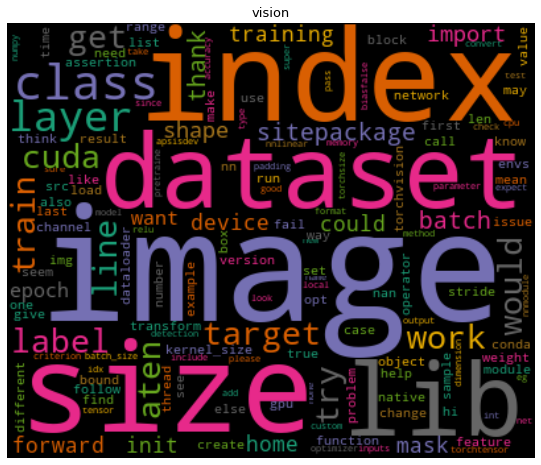

In [27]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
    wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
    plt.figure(figsize=(10,8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title('\n'.join(wrap(title,60)),fontsize=13)
    plt.show()
  
#  Transposing document term matrix
df_dtm=df_dtm.transpose()

# Plotting word cloud for each category
for index,category in enumerate(df_dtm.columns):
    generate_wordcloud(df_dtm[category].sort_values(ascending=False),category)

### **Sentiment Analysis**

In [28]:
# checking only the polarity
from textblob import TextBlob
df['polarity']=df['post'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [31]:
print("5 Random posts with Highest Polarity:")
for index,post in enumerate(df.iloc[df['polarity'].sort_values(ascending=False)[:5].index]['post']):
    print('\n \n \n post {}: '.format(index+1),post)

5 Random posts with Highest Polarity:

 
 
 post 1:  torchrfft onnx question onnx export use torchrfft forward function would work onnx opset support fft yetdo let know thank think get funnylooke operator aten onnx question course backend would execute operator best regard thomas would cpu run onnxruntime cursory look seem contribute operator show commicrosoftrfft maybe pretend atenrfft custom op register custom onnx operator best regard thomas

 
 
 post 2:  difference nnembedde nnlinear difference nnembedde nnlinear embed thing fc layer excellent answer python difference embedding layer bias immediately afterwards linear layer stack overflow

 
 
 post 3:  treat interval hi integer shape eg want convert size nxc every row n indice interval n assign otherwise also know every entry cuse example c ideal way without explicit loop torcharange c dtypetdtype bool none none broadcasting c n int boolslong

 
 
 post 4:  issue predict variable length pretraine train padded value hi newbie pytr

In [32]:
print("5 Random posts with Lowest Polarity:")
for index,post in enumerate(df.iloc[df['polarity'].sort_values(ascending=True)[:3].index]['post']):
    print('\n \n \n post {}: '.format(index+1),post)

5 Random posts with Lowest Polarity:

 
 
 post 1:  order list return torchdistributedall_gather hi wonder order list return torchdistributedall_gatheris position come torchdistributedget_rank thank yes ith list come rank

 
 
 post 2:  receive invalid combination argument _ ssim window selfwindow_size channel selfsize_average line window padding window_size group channel typeerror receive invalid combination argument get paddingfloat groupsint expect one weight bias tuple int stride tuple int pad tuple int dilation int group weight bias tuple int stride str pad tuple int dilation int group base message pass float value padding argument support transform window_size int work

 
 
 post 3:  enumerate modulelist python enumerate modulelisti codefor direction enumerate selfdirection state state out_state direction inp state output output_states out_state base gettingruntimeerror module object iterablefrom direction enumerate selfdirection
